## Great, now that we discussed a little let's continue

Given that the current approach utilized by the authors lacks reproducibility, we will explore an alternative method by leveraging nf-core pipelines for data analysis.

Please explain, how we will achieve reproducibility for the course  with this approach.


We are shifting from ad-hoc, manual scripts to standardized, community-validated nf-core pipelines which will make it more reproducible for future work as the pipeline(s) with the same data should always come to the same solutions.

You have successfully downloaded 2 of the fastq files we will use in our study.

What is the next step if we want to first have a count table and check the quality of our fastq files? What is the pipeline called to do so?

rnaseq, we need to run another nf-core pipeline

Analyze the 2 files using an nf-core pipeline.

What does this pipeline do?

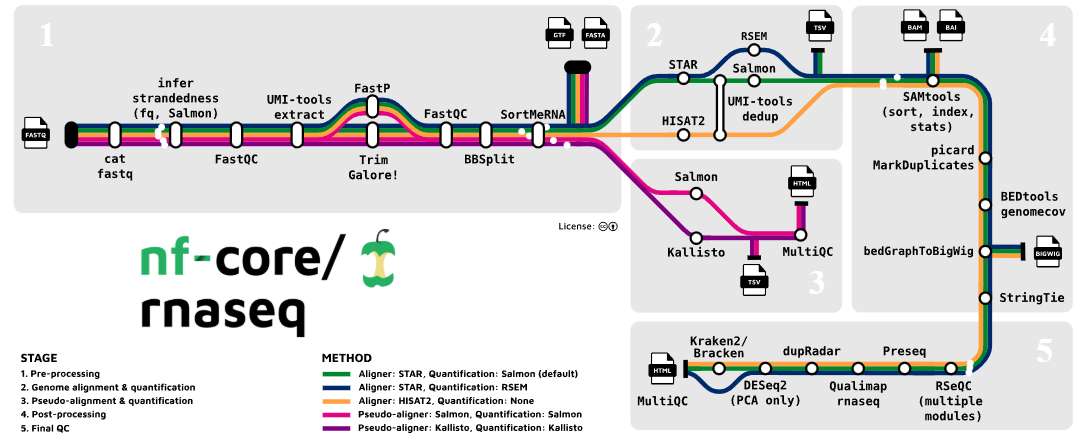

nf-core/rnaseq is a bioinformatics pipeline that can be used to analyse RNA sequencing data obtained from organisms with a reference genome and annotation. It takes a samplesheet with FASTQ files or pre-aligned BAM files as input, performs quality control (QC), trimming and (pseudo-)alignment, and produces a gene expression matrix and extensive QC report.

Which are the main tools that will be used in the pipeline?

QC / preprocessing: FastQC – raw read quality, Trim Galore – adapter/quality trimming, FastQ Screen / BBMap – contamination checks

Alignment & quantification: STAR – spliced alignment to reference genome, Salmon – transcript quantification (alignment-based or quasi-mapping)

Gene counts: featureCounts – gene-level read summarization

QC after alignment: RSeQC – mapping metrics (strandness, inner distance, junctions, etc.), Picard / Samtools – BAM processing, stats

Reporting: MultiQC – aggregates all tool outputs into one HTML report

As all other nf-core pipelines, the chosen pipeline takes in a samplesheet as input.

Use Python and pandas to create the samplesheet for your 2 samples. Feel free to make use of the table you created earlier today.

Choose your sample names wisely, they must be the connection of the results to the metadata. If you can't find the sample in the metadata later, the analysis was useless.

In [ ]:
# get sample id from tsv from metadata
# get run_accesion from metadata
# add strandedness auto

import pandas as pd

metadata_11 = pd.read_csv("usb_data/metadata/SRR23195511.runinfo_ftp.tsv", sep="\t")
metadata_16 = pd.read_csv("usb_data/metadata/SRR23195516.runinfo_ftp.tsv", sep="\t")

In [28]:
index_1 = metadata_11["run_accession"].values[0]
index_2 = metadata_16["run_accession"].values[0]
df = pd.DataFrame([
    {
        "sample": metadata_11["experiment_accession"].values[0],
        "fastq_1": "usb_data/fastq/"+str(index_1)+".fastq.gz",
        "fastq_2": "usb_data/fastq/"+str(index_1)+".fastq.gz",
        "strandedness": "auto"
    },
    {
        "sample": metadata_16['experiment_accession'].values[0],
        "fastq_1": "usb_data/fastq/"+str(index_2)+".fastq.gz",
        "fastq_2": "usb_data/fastq/"+str(index_1)+".fastq.gz",
        "strandedness": "auto"
    }
])
df.head()

,sample,fastq_1,fastq_2,strandedness
0,SRX19144488,usb_data/fastq/SRR23195511.fastq.gz,usb_data/fastq/SRR23195511.fastq.gz,auto
1,SRX19144486,usb_data/fastq/SRR23195516.fastq.gz,usb_data/fastq/SRR23195511.fastq.gz,auto


In [ ]:
# post here the command you used to run nf-core/rnaseq

# nextflow run nf-core/rnaseq --input fetchngs-out/samplesheet/samplesheet.csv --outdir rnseq_results --genome GRCm38 
# --aligner star_salmon -profile docker --max_memory '6 GB' --max_cpus 2

Explain all the parameters you set and why you set them in this way.



I set star_salmon as aligner because its the default aligner and it has a 50 fold aligning speed compared to common aligners according to nf-core documentation

I set docker as profile so it runs on my computer

I set input as path to samplesheet obtained from the last nf-core pipeline

I set max_memory to 6 GB because I only have 7 GB RAM

I set max_cpus to 2 because I only have 4 and I would like my laptop to not die

I set genome to GRCm38 because it is a suitable reference mouse genome

The pipline does not run due to the genome so I cannot make sure these parameters are right and make sense but according to research they do make sense.


## Browsing the results

How did the pipeline perform?

Incredibly bad, usability -10

Explain the quality control steps. Are you happy with the quality and why. If not, why not.
Please give additional information on : 
- ribosomal rRNA
- Duplication
- GC content

What are the possible steps that could lead to poorer results?

Would you exclude any samples? If yes, which and why?

What would you now do to continue the experiment? What are the scientists trying to figure out? Which packages on R or python would you use?